In [3]:
import cptac
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [4]:
def Check_CNV_Status(cnv_val):
    if ((cnv_val > 0.2) | (cnv_val < -0.2)):
        return 1
    else:
        return 0
    
def Access_CPTAC(accessor):
    cnv = accessor.get_CNV('washu')
    return cnv

def Format_Data(column,df):
    if column in df:
        pulled_column = df[str(column)]
        pulled_column = pulled_column.dropna()
        lst = []
        for inner_list in pulled_column.values:
            lst.extend(inner_list)
        return lst

In [5]:
def Get_CNV_Totals(cnv_orig):
    cnv_totals = cnv_orig.map(Check_CNV_Status)
    return(cnv_totals.sum(axis=1).to_frame())

In [23]:
def Compare_CNV_Totals(cnv_dat,cancer_types):
    data = []
    for cnv in cnv_dat:
        temp = Get_CNV_Totals(cnv)
        temp = temp.rename(columns={temp.columns[0]:'CNV_Scores'})
        data += [temp]
    formatted_data = []
    for cnv in data:
        formatted_data += [cnv['CNV_Scores']]

    plt.boxplot(formatted_data)
    plt.title('CNV Totals in Different Cancer Types')
    plt.xlabel('Cancer Type')
    plt.ylabel('Total of CNV Events per Patient')
    vals = list(range(1,len(cancer_types)+1))
    plt.xticks(vals, cancer_types)

    plt.show()

In [12]:
cancer_types = ['ov','lscc','luad','brca','gbm','coad','hnscc','ccrcc','ucec','pdac']
data_accessors = {'ov':cptac.Ov(),'lscc':cptac.Lscc(),'luad':cptac.Luad(),'brca':cptac.Brca(),
                  'gbm':cptac.Gbm(),'coad':cptac.Coad(),'hnscc':cptac.Hnscc(),'ccrcc':cptac.Ccrcc(),
                  'ucec':cptac.Ucec(),'pdac':cptac.Pdac()}

In [13]:
cnv_data_all_cancers = []

for accessor in data_accessors:
    cnv = Access_CPTAC(data_accessors[accessor])
    cnv_data_all_cancers += [cnv]

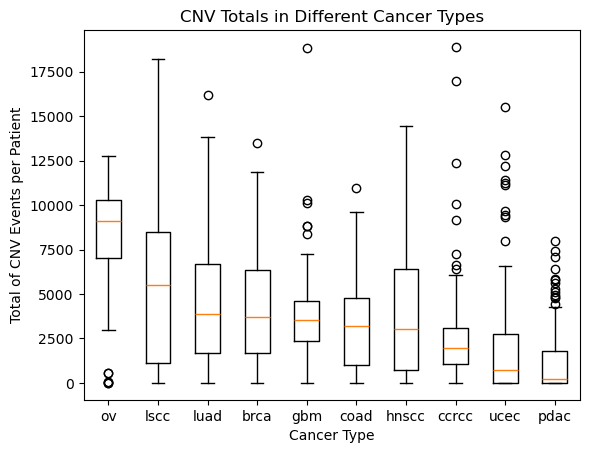

In [24]:
Compare_CNV_Totals(cnv_data_all_cancers,cancer_types)